In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [87]:
data.head()

,gender,race,parental_edu_level,lunch,prep_course,mathScore,reScore,wrScore,totalScore,averageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [4]:
data.shape

(1000, 8)

# **Understanding the Problem Statement**

The dataset presented contains 1000 records documenting students' background and academic performance. The goal of this project is to understand how these features (gender, ethnicity, parents' level of education etc.) affect student performance.



# **Data Collection**

the dataset was pulled from [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977). 
It contains 1000 rows and 8 columns.


## **1)- Dataset information:**


*   gender: student's gender.
*   race/ethnicity: ethnicity of the student.
*   parental level of education: highest educational level achieved by parents. 
*   lunch: free/reduced school lunch or standard (paid).
*   test preparation course: students' completion of the test prep course. 
*   math score: student's math score.
*   reading score: student's reading score.
*   writing score: student's writing score.









 ##  **2)-  Renaming the columns:**

In [5]:
columns_renamed = {
    "race/ethnicity":"race",
     "parental level of education":"parental_edu_level",
     "test preparation course":"prep_course",
     "math score":"mathScore",
     "writing score":"wrScore",
     "reading score": "reScore",
     
}
data.rename(columns = columns_renamed, inplace = True)

In [6]:
data.head()

,gender,race,parental_edu_level,lunch,prep_course,mathScore,reScore,wrScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.isna().sum()

gender                0
race                  0
parental_edu_level    0
lunch                 0
prep_course           0
mathScore             0
reScore               0
wrScore               0
dtype: int64

 **Missing values**: There aren't any missing values in the dataset

**Checking for duplicates:**


In [8]:
data.duplicated().sum()

0

**Duplicates**: there are no duplicates in the dataset 

## **3)- Checking data types:**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race                1000 non-null   object
 2   parental_edu_level  1000 non-null   object
 3   lunch               1000 non-null   object
 4   prep_course         1000 non-null   object
 5   mathScore           1000 non-null   int64 
 6   reScore             1000 non-null   int64 
 7   wrScore             1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## **4)- Checking the number of unique values in the dataset columns:**

In [10]:
data.nunique()

gender                 2
race                   5
parental_edu_level     6
lunch                  2
prep_course            2
mathScore             81
reScore               72
wrScore               77
dtype: int64

## **5)- Extracting statistical insights:**

In [11]:
data.describe()

,mathScore,reScore,wrScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


*   Around 50% of the students scored less than the average across the 3 subjects (the observations are unique)
*   The means are close to each other (66-69)
*   The minimum grade scored in math is 0, while 17 in reading, and 10 in writing.
*   The standard deviaition values are very close to each other as well (15.16 - 15.19)





In [12]:
data.head()

,gender,race,parental_edu_level,lunch,prep_course,mathScore,reScore,wrScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **6)- Exploring the dataset:**

In [13]:
print("Categories in 'parental_edu_level' variable:     ",end=" " )
print(data['parental_edu_level'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'prep_course' variable:     ",end=" " )
print(data['prep_course'].unique())

print("Categories in 'race' variable:     ",end=" " )
print(data['race'].unique())

Categories in 'parental_edu_level' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'prep_course' variable:      ['none' 'completed']
Categories in 'race' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['mathScore', 'reScore', 'wrScore']

We have 5 categorical features : ['gender', 'race', 'parental_edu_level', 'lunch', 'prep_course']


## **7)- Adding columns for "Total Score" and "Average"**:

In [15]:
data.head(3)

,gender,race,parental_edu_level,lunch,prep_course,mathScore,reScore,wrScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [16]:
data['totalScore'] = data['mathScore'] + data['reScore'] + data['wrScore']
data['averageScore'] = data['totalScore'] / 3

data.head()

,gender,race,parental_edu_level,lunch,prep_course,mathScore,reScore,wrScore,totalScore,averageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
data['averageScore'] = data['averageScore'].round()
data['averageScore']

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: averageScore, Length: 1000, dtype: float64

Some statistical insights based on the new total score column:

In [18]:
data.describe()

,mathScore,reScore,wrScore,totalScore,averageScore
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.762000
std,15.16308,14.600192,15.195657,42.771978,14.258354
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.000000
50%,66.00000,70.000000,69.000000,205.000000,68.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


* the average total score is about 67.8/100. 
* The minimum total score is 9
* 50% of the students scored a total less than the average.
* 25% of the students scored a total score above 78/100.





In [19]:
students_perfect_average_score = data[data['averageScore']==100]
number_students_fullScore = len(students_perfect_average_score)
print("the number of students with a perfect total average score is: {n}".format(n=number_students_fullScore))

the number of students with a perfect total average score is: 4


In [20]:
math_perfect_score = data[data["mathScore"] == 100]['averageScore'].count()
reading_perfect_score = data[data["reScore"] == 100]['averageScore'].count()
writing_perfect_score = data[data["wrScore"] == 100]['averageScore'].count()

In [21]:
print("the number of students with a perfect math score is: {math_score}".format(math_score=math_perfect_score))
print("the number of students with a perfect reading score is: {math_score}".format(math_score=reading_perfect_score))
print("the number of students with a perfect writing score is: {math_score}".format(math_score=writing_perfect_score))

the number of students with a perfect math score is: 7
the number of students with a perfect reading score is: 17
the number of students with a perfect writing score is: 14


In [22]:
reading_less_20 = data[data['reScore'] <= 20]['averageScore'].count()
writing_less_20 = data[data['wrScore'] <= 20]['averageScore'].count()
math_less_20 = data[data['mathScore'] <= 20]['averageScore'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


* more Students performed poorly in Math than reading and writing.   






In [23]:
reading_more_80 = data[data['reScore'] >= 80]['averageScore'].count()
writing_more_80 = data[data['wrScore'] >= 80]['averageScore'].count()
math_more_80 = data[data['mathScore'] >= 80]['averageScore'].count()

print(f'Number of students with more than 80 marks in Maths: {reading_more_80}')
print(f'Number of students with more than 80 marks in Writing: {writing_more_80}')
print(f'Number of students with more than 80 marks in Reading: {math_more_80}')

Number of students with more than 80 marks in Maths: 249
Number of students with more than 80 marks in Writing: 235
Number of students with more than 80 marks in Reading: 193


## **8)- Histograms & KDE:**

In [24]:
import matplotlib.pyplot as plt

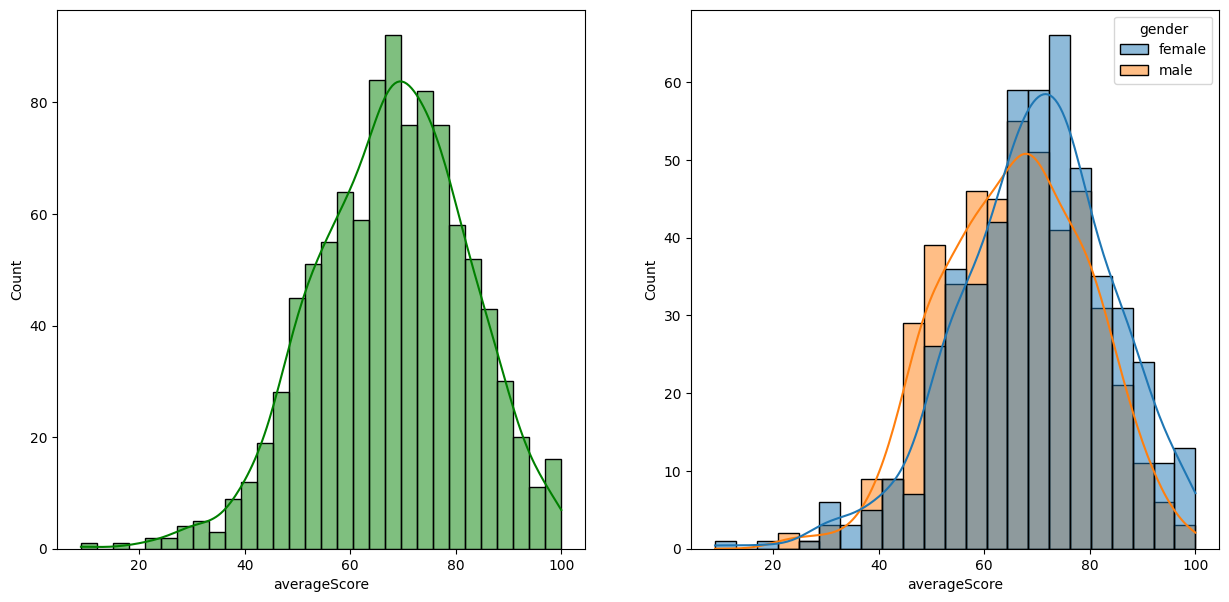

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='averageScore',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='averageScore',kde=True,hue='gender')
plt.show()

* Both distributions seem left-skewed (negatively skewed) with a normal distribution.
 



## **Checking for Outliers:**

In [26]:

Q1 = np.percentile(data['averageScore'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(data['averageScore'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(data['averageScore'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  58.0
Q1 50 percentile of the given data is,  68.0
Q1 75 percentile of the given data is,  78.0
Interquartile range is 20.0


<ipython-input-26-9ead7d862f32>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['averageScore'], 25, interpolation = 'midpoint')
<ipython-input-26-9ead7d862f32>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['averageScore'], 50, interpolation = 'midpoint')
<ipython-input-26-9ead7d862f32>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22

In [27]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 28.0
up_limit is 108.0


In [28]:

outlier =[]
for x in data['averageScore']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [26.0, 9.0, 26.0, 23.0, 23.0, 18.0]


*   There are 6 outliers in the dataset.



<ipython-input-29-a2f1497ee0a0>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
<ipython-input-29-a2f1497ee0a0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


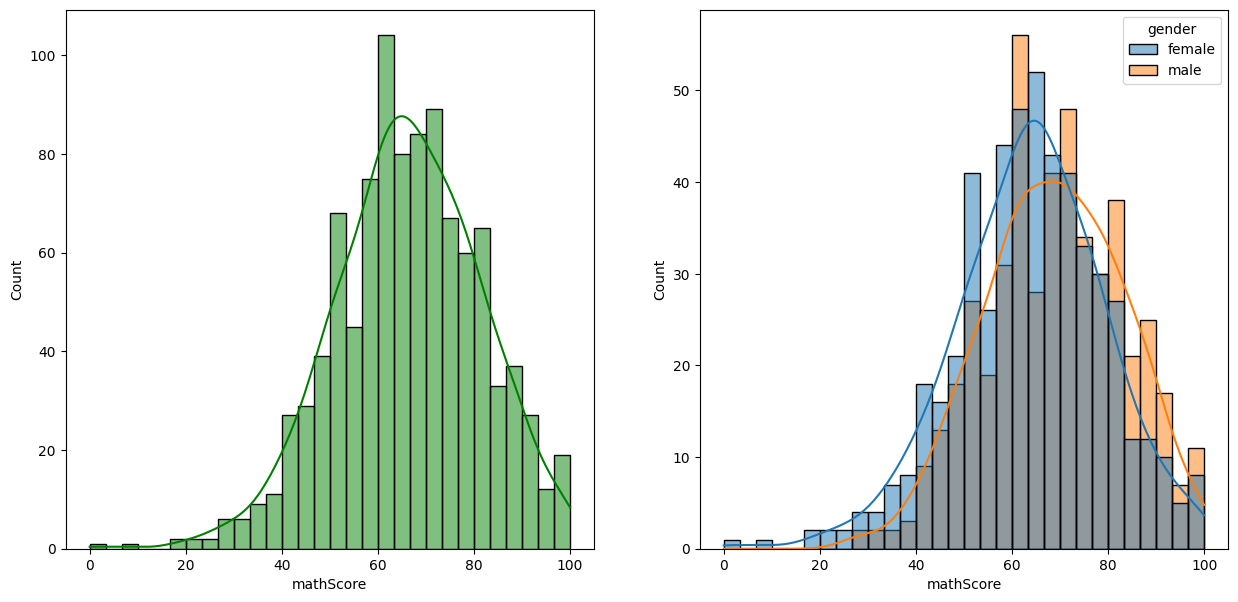

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='mathScore',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='mathScore',bins=30,kde=True,hue='gender')
plt.show()

* Female students performed higher than males in the math exam. 




<Axes: xlabel='wrScore', ylabel='Count'>

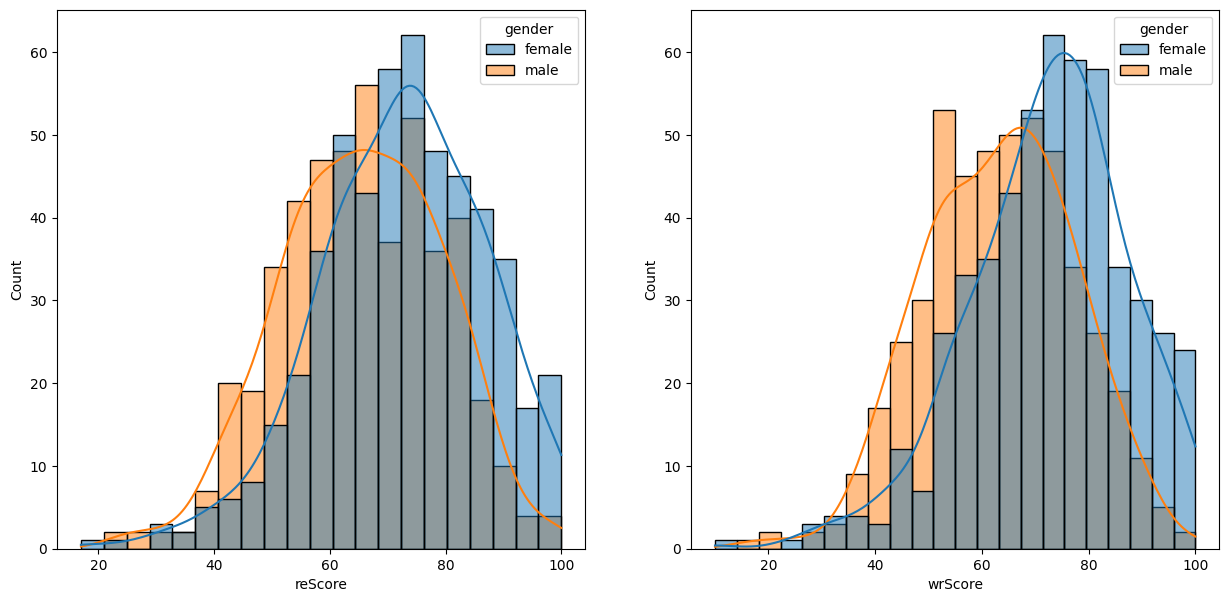

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='reScore',kde=True,hue='gender')
plt.subplot(122)
sns.histplot(data=data,x='wrScore',kde=True,hue='gender')

*   Female students performed higher in the reading and writing exams.



<ipython-input-31-778af00e7a8b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-31-778af00e7a8b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-31-778af00e7a8b>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


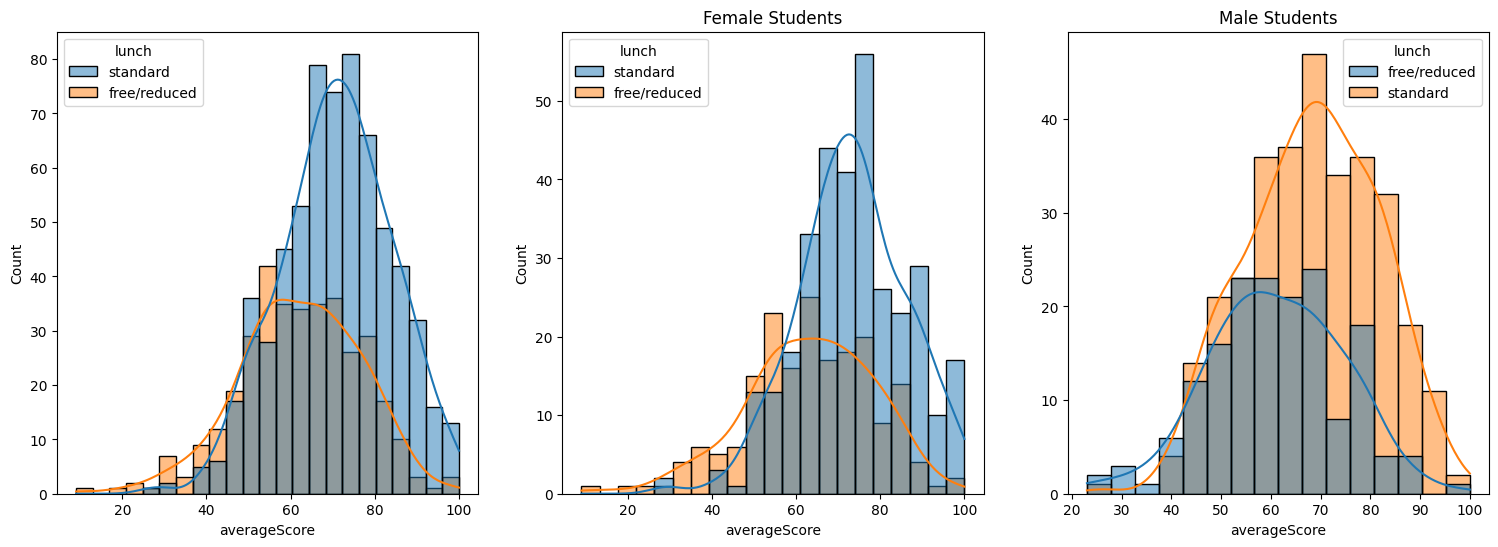

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='averageScore',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='averageScore',kde=True,hue='lunch').set(title='Female Students')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='averageScore',kde=True,hue='lunch').set(title='Male Students')
plt.show()

insights:

*   The average among those with free or reduced lunch is lower than that among students with standard lunch. -> standard lunch helps students perform well in the exams amongst both genders




<ipython-input-32-e6915b6b2a4b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-32-e6915b6b2a4b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-32-e6915b6b2a4b>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


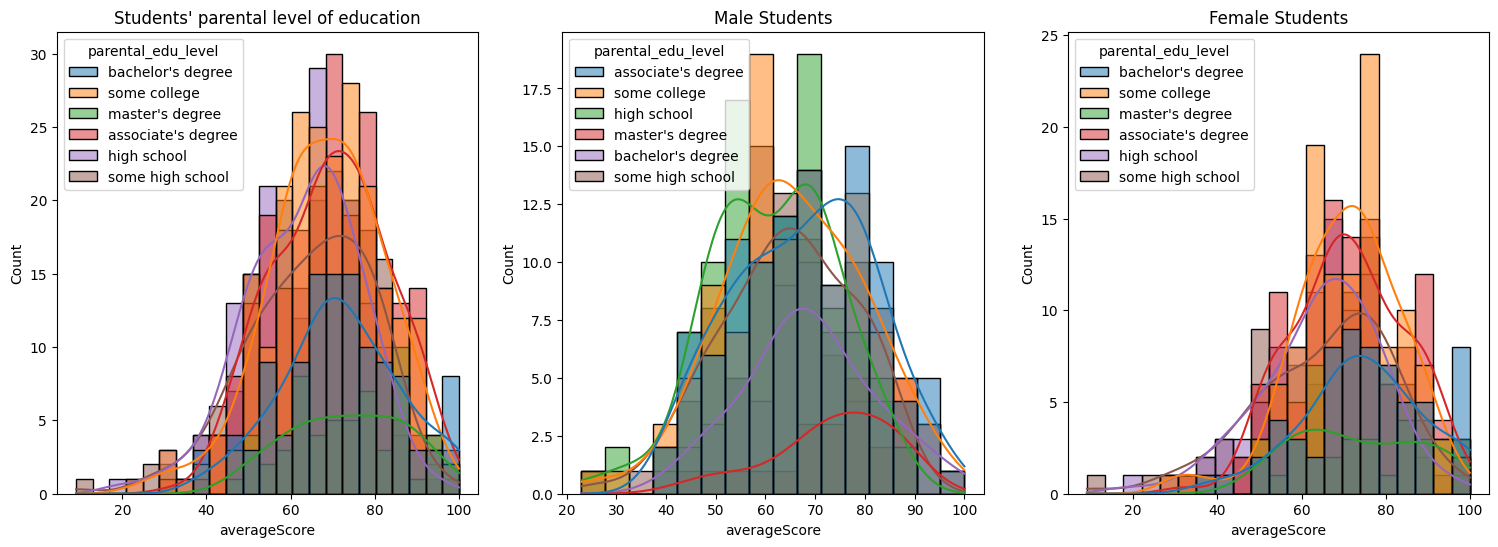

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='averageScore',kde=True,hue='parental_edu_level').set(title="Students' parental level of education")
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='averageScore',kde=True,hue='parental_edu_level').set(title='Male Students')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='averageScore',kde=True,hue='parental_edu_level').set(title='Female Students')
plt.show()


*  Parental level of education seems not to be an immediate contributer to the students' performance. It seems from the first subplot that students whose parents hold a master's level education performed worse than the other groups.






<ipython-input-33-5c01bd2f24db>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-33-5c01bd2f24db>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-33-5c01bd2f24db>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


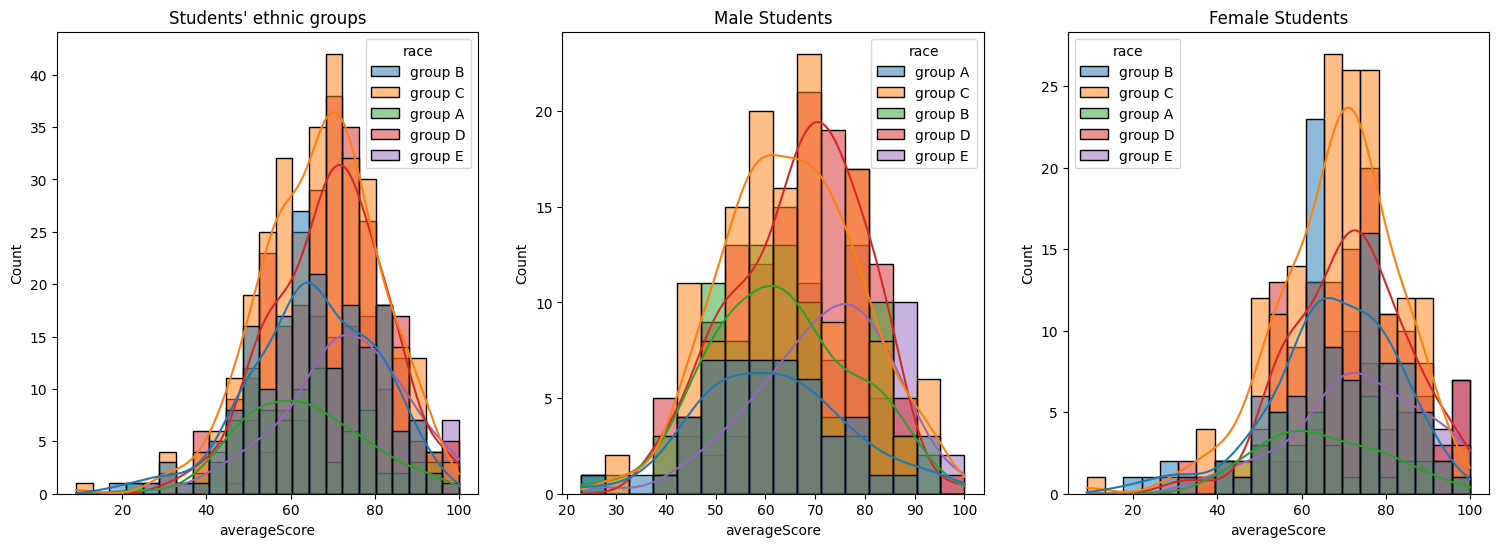

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='averageScore',kde=True,hue='race').set(title="Students' ethnic groups")
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='averageScore',kde=True,hue='race').set(title='Male Students')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='averageScore',kde=True,hue='race').set(title='Female Students')
plt.show()

* Students from ethnic group C performed the best.
* Students from ethnic group A & B performed the least among both genders.



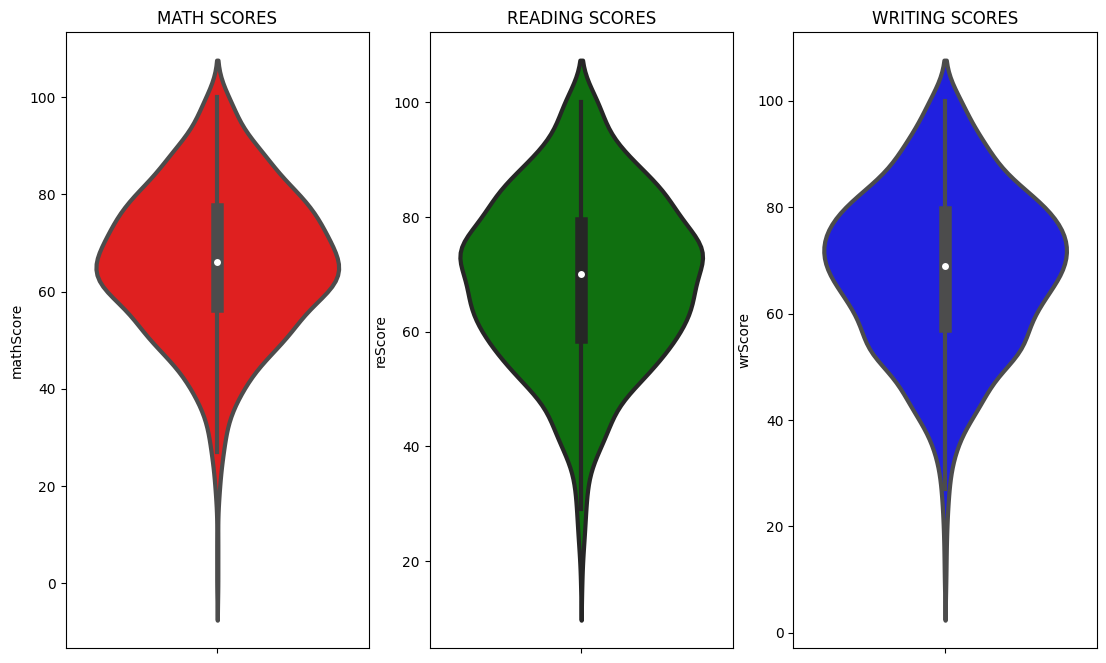

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='mathScore',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reScore',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='wrScore',data=data,color='blue',linewidth=3)
plt.show()

*  The medians' closeness in value is visualized here.




## **9)- Multivariate Analysis**



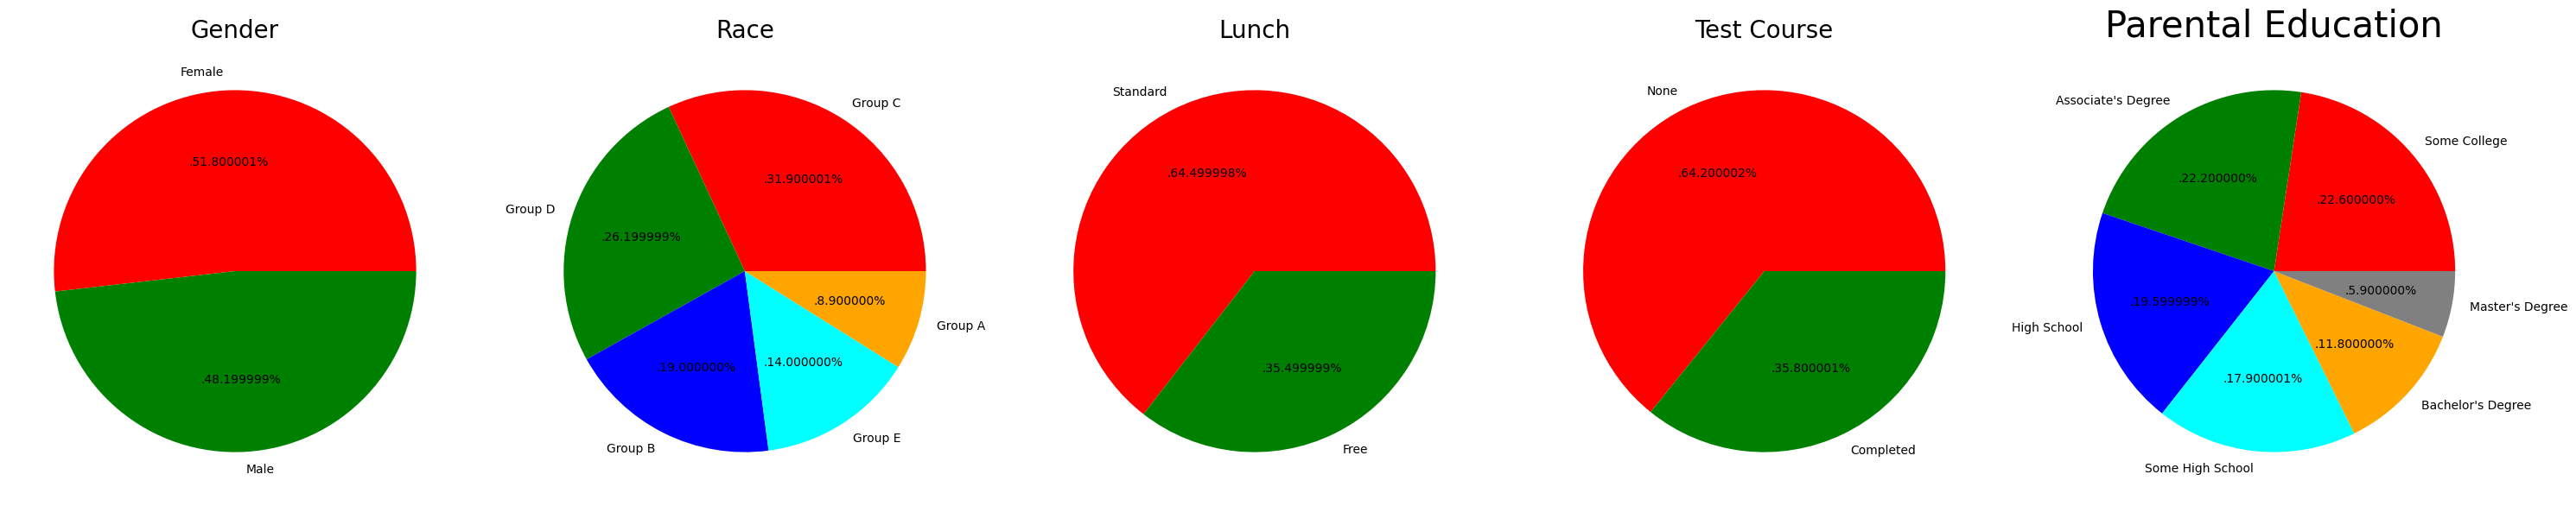

In [35]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['prep_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_edu_level'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

* The gender percentage seems to be almost equally devided.
* Race groups C, B, and D are greately present than groups A & E.
* There are more students with a standard lunch than there are ones who receive free lunch
* More than half of the students did not complete the test course for the exam.








## **10)- Feature Wise Visualization**

**1-Gender Column**

1-1) Univariate Analysis **(how is the distribution of the 2 genders?)**: 

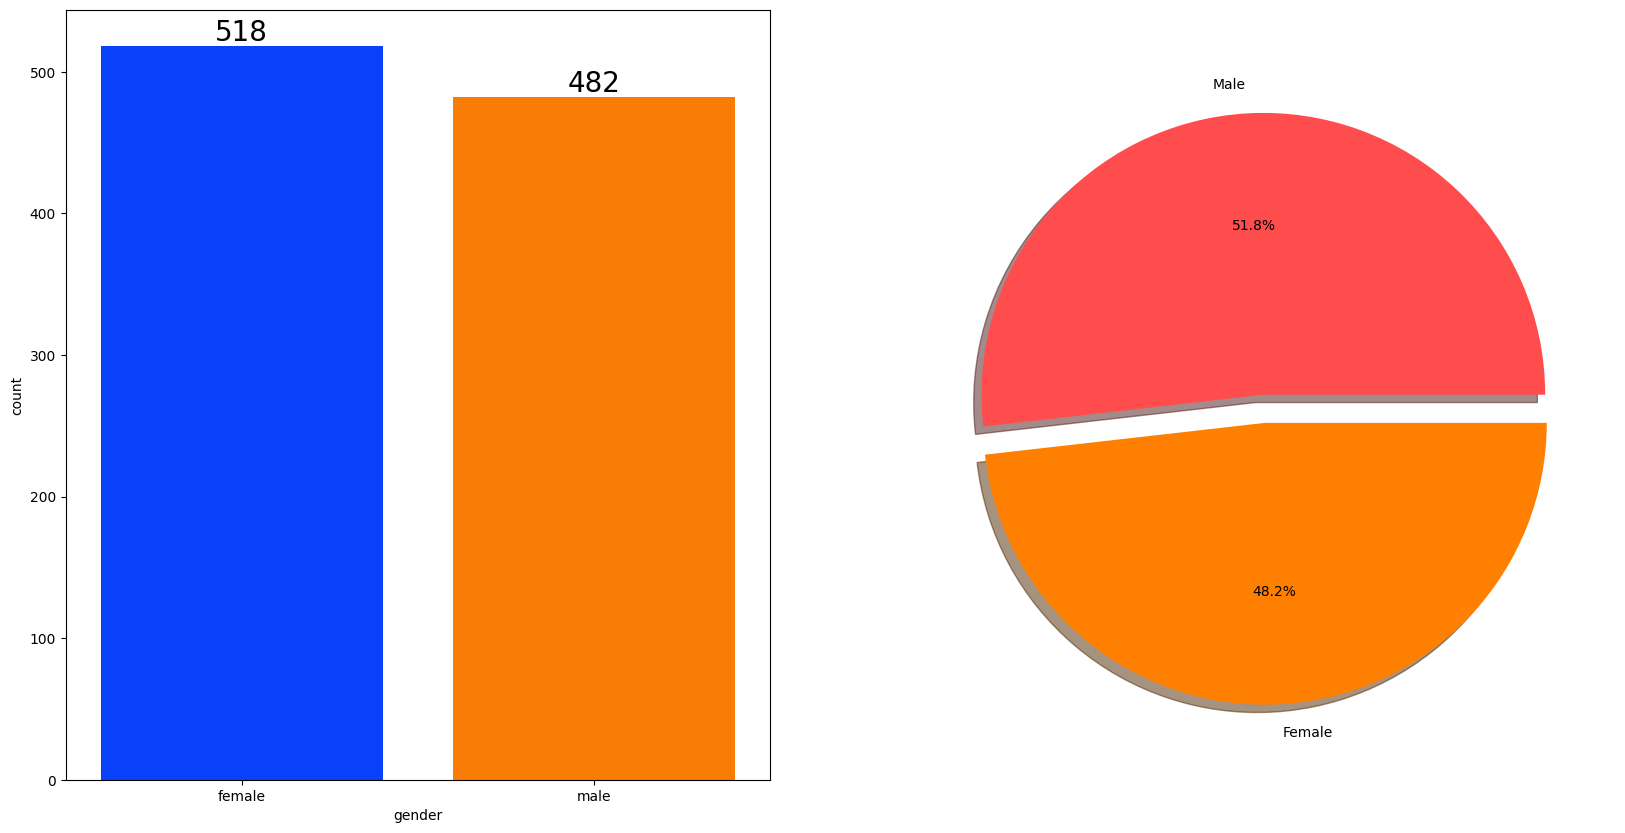

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

* There's almost equal distribution of the two genders in the dataset.



1-2) Bivariate Analysis **(does gender impact the students' performance?)**

In [37]:
gender_group = data.groupby('gender').mean()
gender_group


<ipython-input-37-5dcc1852117f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = data.groupby('gender').mean()


,mathScore,reScore,wrScore,totalScore,averageScore
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.819502


insights:
*  boys performed higher than girls in math: the average for males is around 68.73%, and 63.63% for females. 
*  Overall, females perfomed better than males with around 4% of difference in the average score.



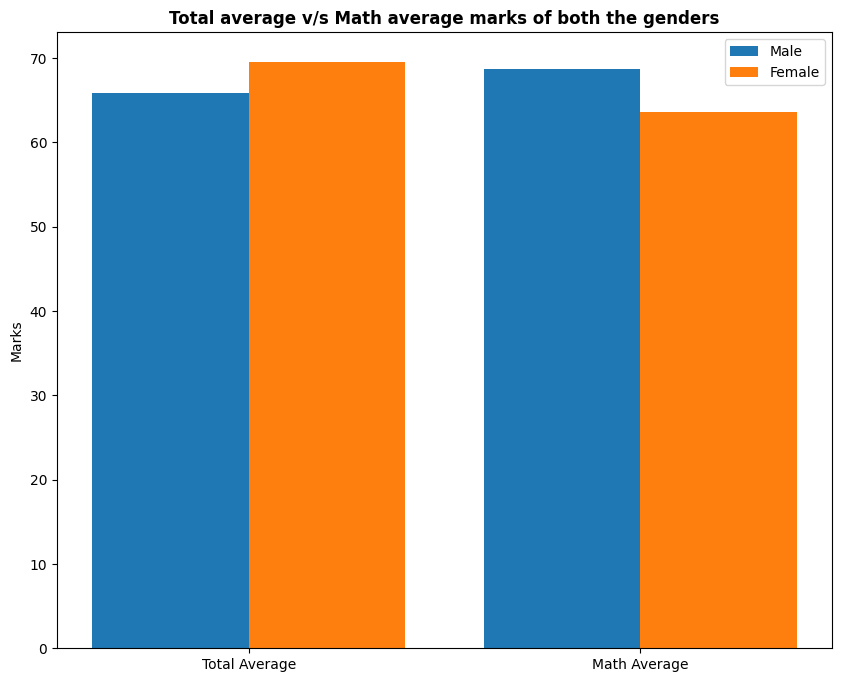

In [43]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['averageScore'][0], gender_group['mathScore'][0]]
male_scores = [gender_group['averageScore'][1], gender_group['mathScore'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**2- Race Column**

1-1) Univariate Analysis (**how is the distribution of the different races?**)

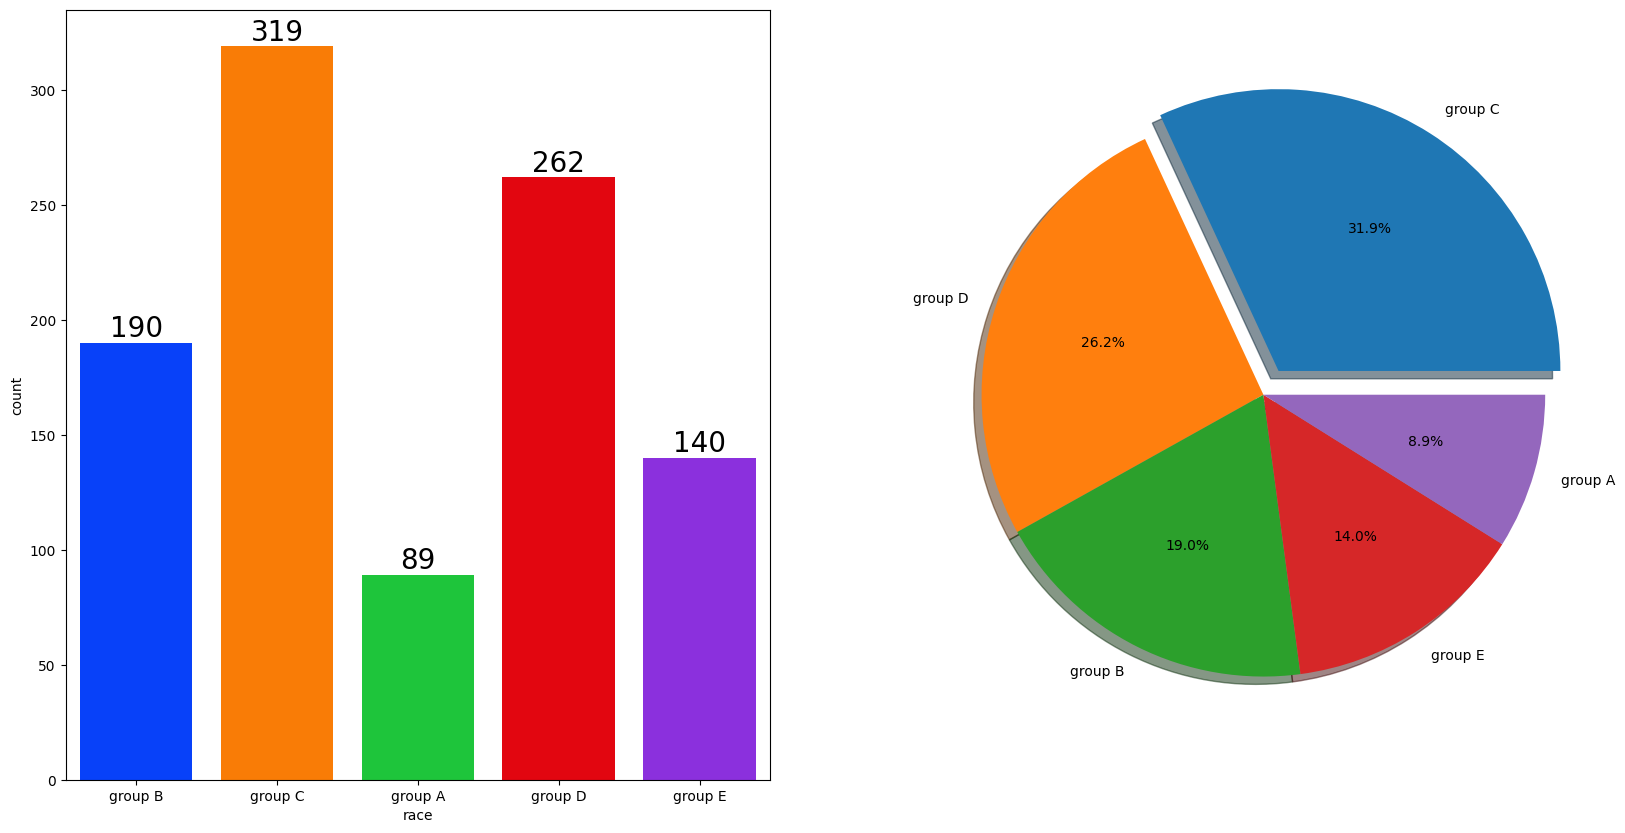

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['race'].value_counts(),labels=data['race'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

insights:
*   Most students are ethnic members of group C followed by group D then B.
*   Group A represents 8.9% of the sample; group A is the smallest in size in the sample.



1-2) Bivariate analysis

In [53]:
race_group = data.groupby('race')
race_group


In [55]:
race_group.mean()

<ipython-input-55-7d8e9a92a3bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_group.mean()


,mathScore,reScore,wrScore,totalScore,averageScore
race,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.955056
group B,63.452632,67.352632,65.600000,196.405263,65.484211
group C,64.463950,69.103448,67.827586,201.394984,67.122257
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.714286


insights:
*   Groups E, D, and C performed the highest overall
*   Group A performed the least with an overage score of 62%.
*   Group E performed the highest in all exam areas averaging 73.82%, 73.02, and 71.40 in math, reading, and writing respectively. 








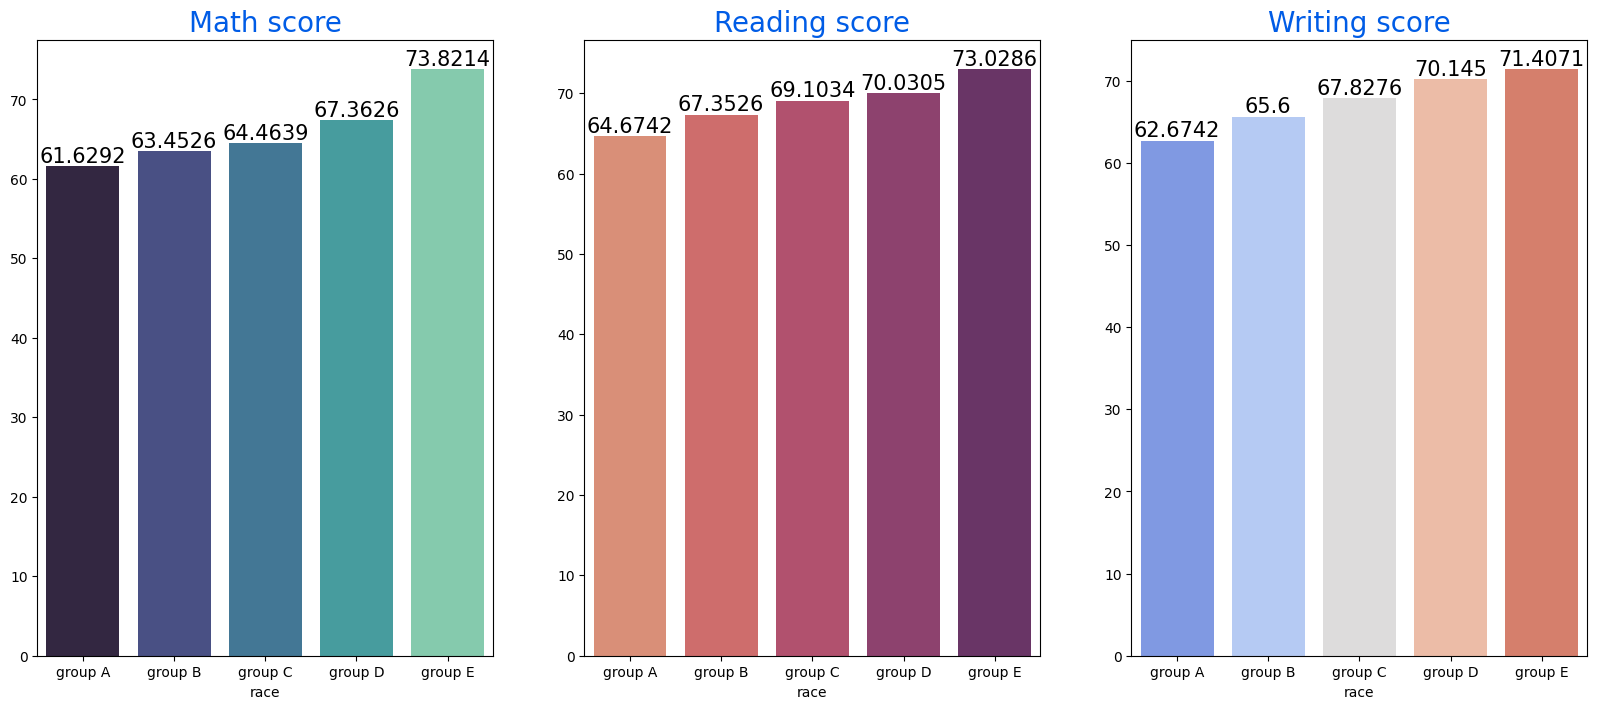

In [54]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['mathScore'].mean().index,y=race_group['mathScore'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['reScore'].mean().index,y=race_group['reScore'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['wrScore'].mean().index,y=race_group['wrScore'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

* the same groups have the same performance in every exam area: Group E is followed by Group D, followed by Group C, followed by Group B, followed by Group A.



**3) Parental Level of Education**

1-1) Univariate Analysis:

In [64]:
data['parental_edu_level']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_edu_level, Length: 1000, dtype: object

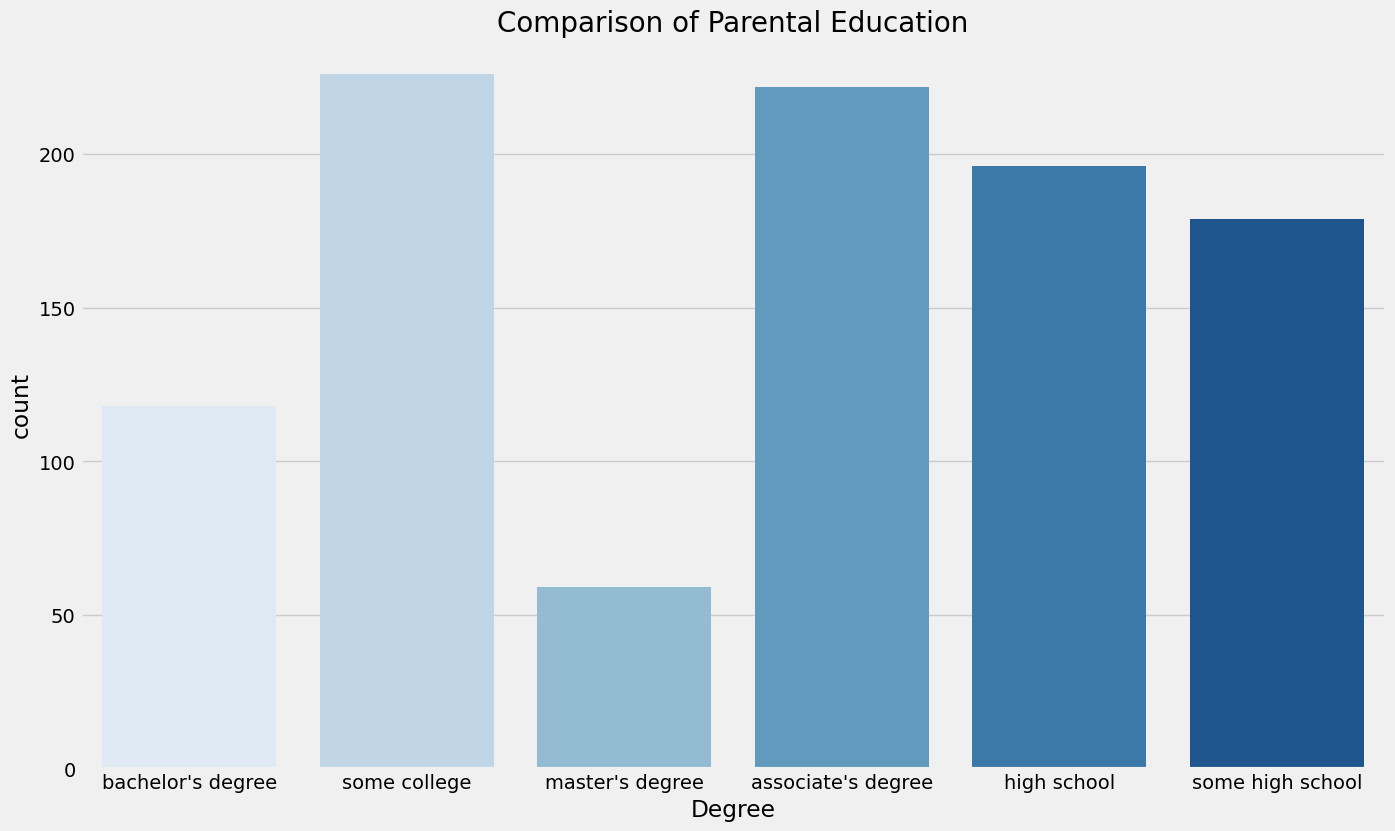

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=data['parental_edu_level'],palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


*   Most students' parents have completed some college.



1-2) Bivariate Analysis

In [69]:
p_edulevel_group= data.groupby('parental_edu_level')
p_edulevel_group_mean = p_edulevel_group.mean()
p_edulevel_group_mean

<ipython-input-69-2bdef87c0ecf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_edulevel_group_mean = p_edulevel_group.mean()


,mathScore,reScore,wrScore,totalScore,averageScore
parental_edu_level,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.558559
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.949153
high school,62.137755,64.704082,62.448980,189.290816,63.122449
master's degree,69.745763,75.372881,75.677966,220.796610,73.576271
some college,67.128319,69.460177,68.840708,205.429204,68.446903
some high school,63.497207,66.938547,64.888268,195.324022,65.072626


insights:

* Students' whose parents hold a master's, bachelor's, or associate degree performed the best overall.
* Students whose parents hold a high school level of education performed the least overall.



<ipython-input-70-e6c7bdcae6c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('parental_edu_level').agg('mean').plot(kind='barh',figsize=(10,10))


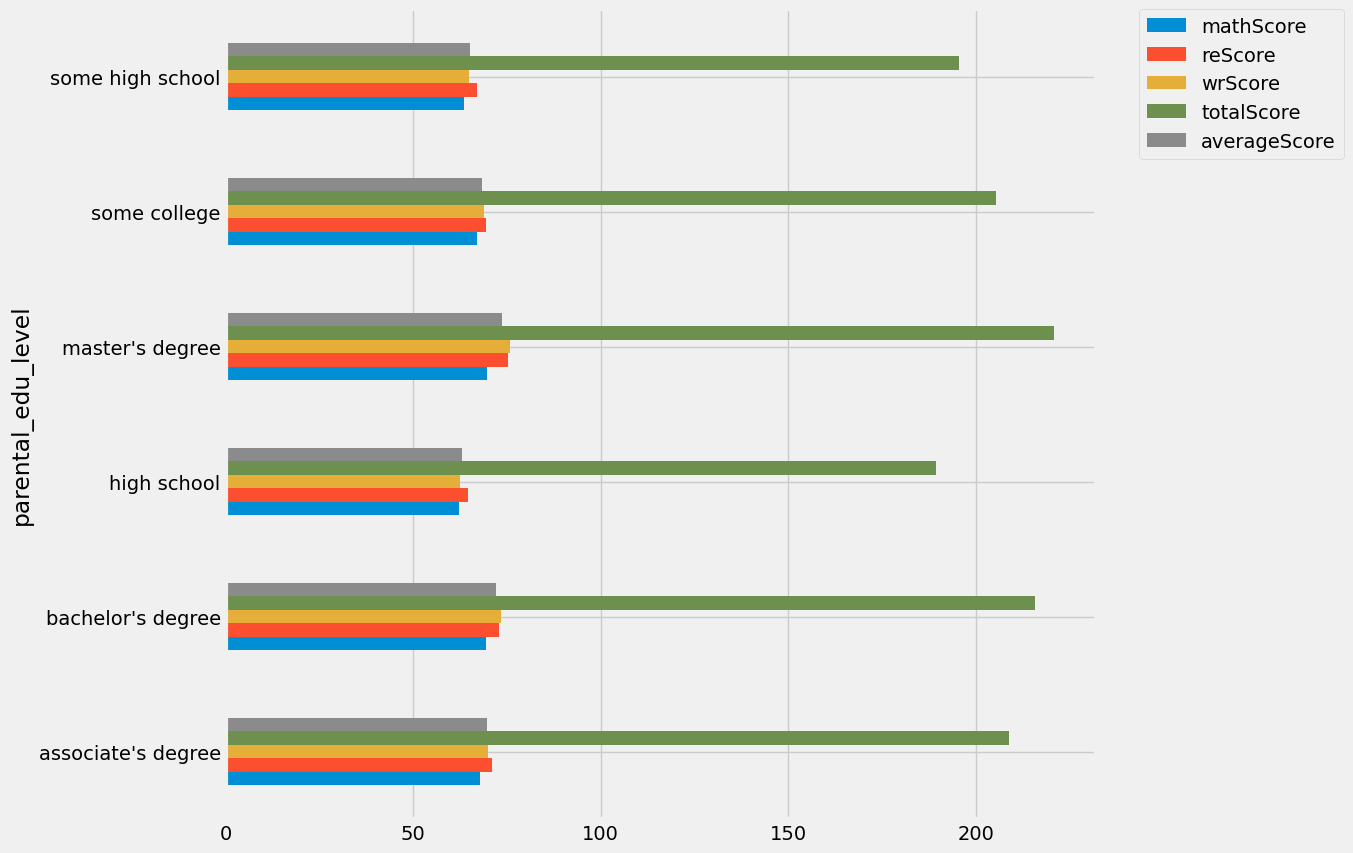

In [70]:
data.groupby('parental_edu_level').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


The score of student whose parents possess master and bachelor level 
education are higher than others.

**4) Lunch Column**

4-1) Univariate Analysis:

In [71]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

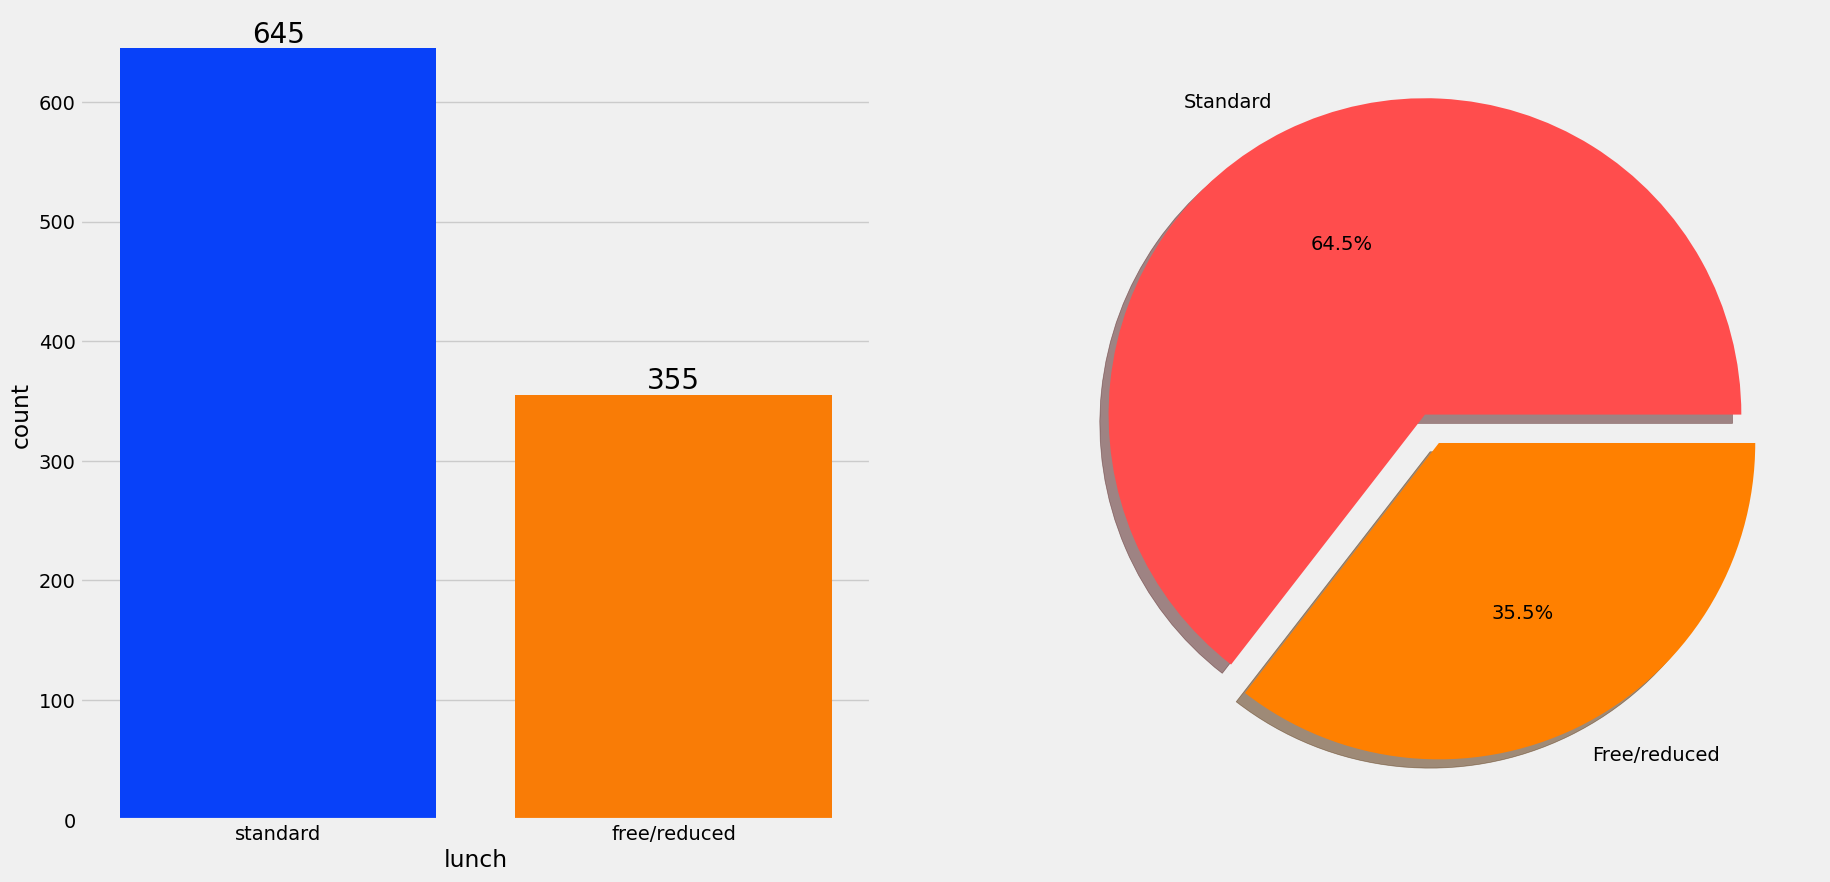

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['lunch'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['lunch'].value_counts(),labels=['Standard','Free/reduced'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


*  Most students receive standard lunch.



4-2) Bivariate Analysis:

In [75]:
lunch_group = data.groupby('lunch')
lunch_group_mean = lunch_group.mean()
lunch_group_mean

<ipython-input-75-134056d053fe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lunch_group_mean = lunch_group.mean()


,mathScore,reScore,wrScore,totalScore,averageScore
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.191549
standard,70.034109,71.654264,70.823256,212.511628,70.827907


Insights:
*   Student who receive standard lunch outperformed students who received free or reduced lunch.



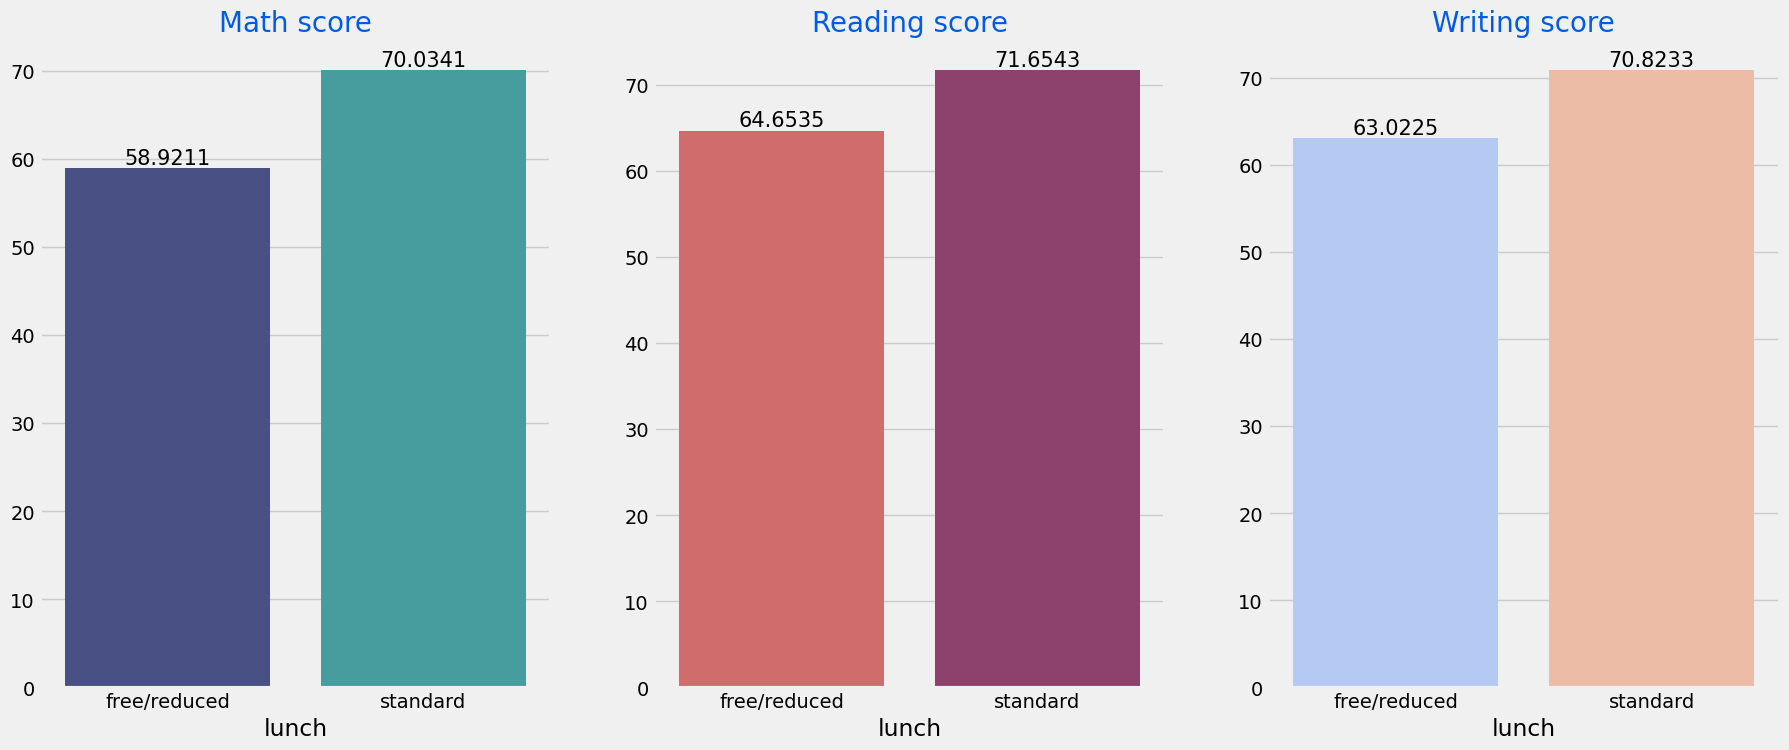

In [76]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=lunch_group['mathScore'].mean().index,y=lunch_group['mathScore'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=lunch_group['reScore'].mean().index,y=lunch_group['reScore'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=lunch_group['wrScore'].mean().index,y=lunch_group['wrScore'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**5) Test Prep Course:**

5-1) Univariate Analysis:

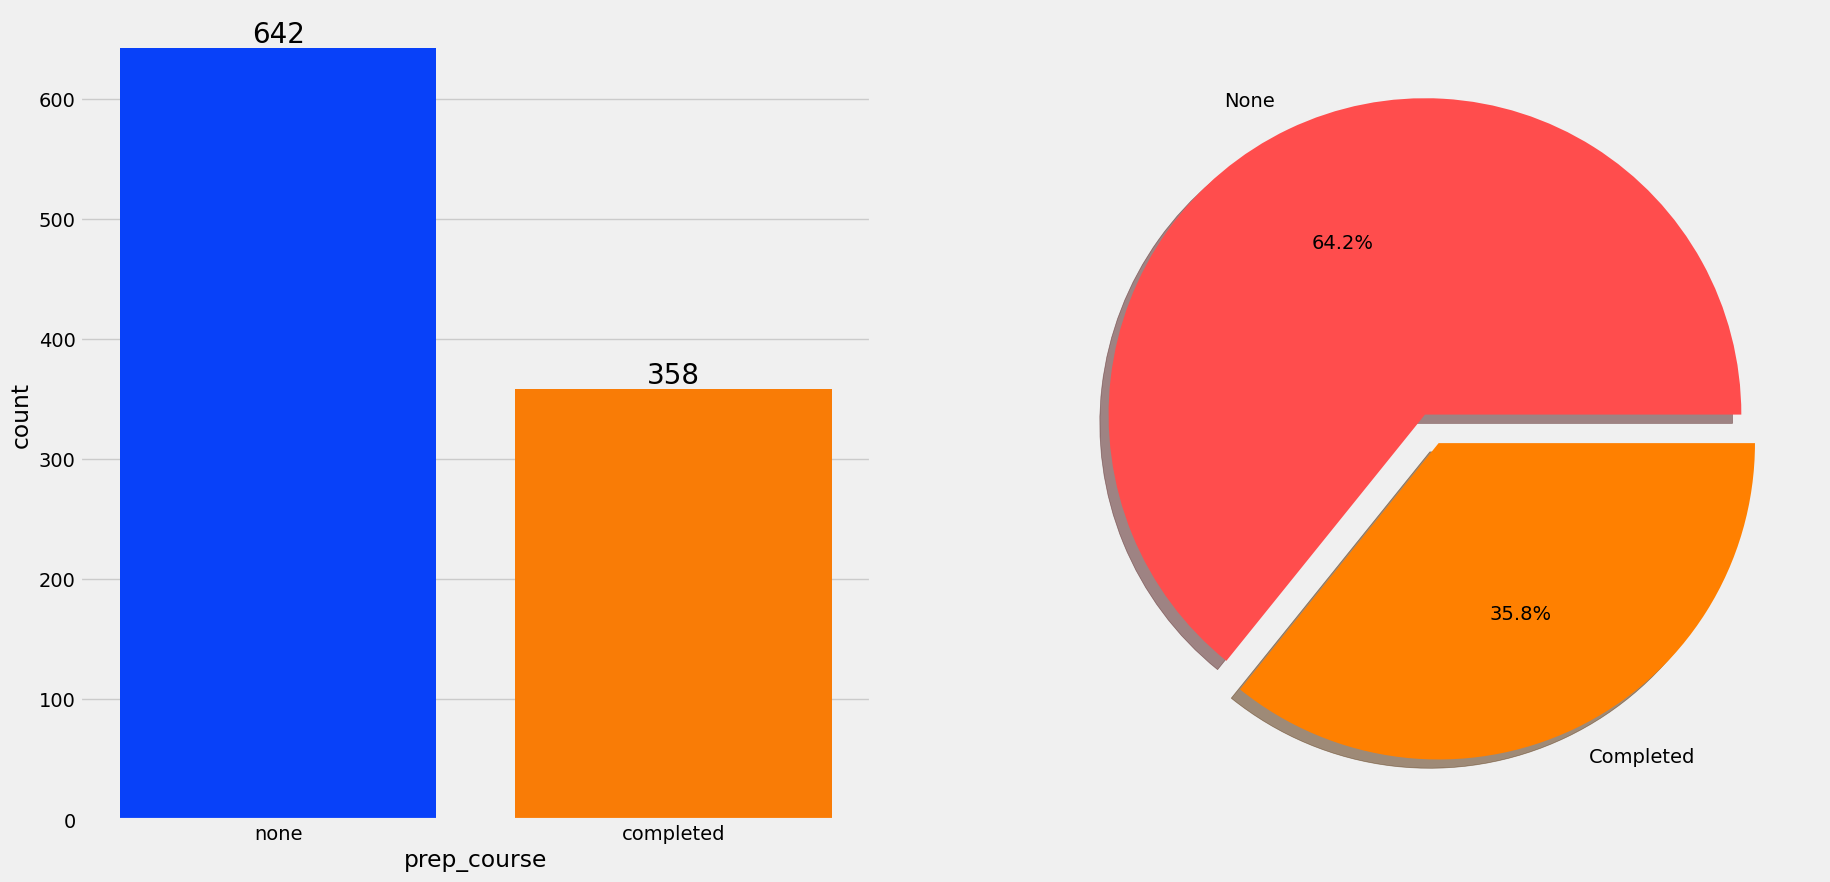

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['prep_course'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['prep_course'].value_counts(),labels=['None','Completed'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

*  Most students did not complete the exam prep course.



5-2) Bivariate Analysis:

In [85]:
prep_group = data.groupby('prep_course')
prep_group_mean = prep_group.mean()
prep_group_mean

<ipython-input-85-1c4b0b5c952e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prep_group_mean = prep_group.mean()


,mathScore,reScore,wrScore,totalScore,averageScore
prep_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.670391
none,64.077882,66.534268,64.504673,195.116822,65.024922


*   Those who have completed the exam prep course scored higher overall than those who did not.
 





## **Checking for Outliers:**

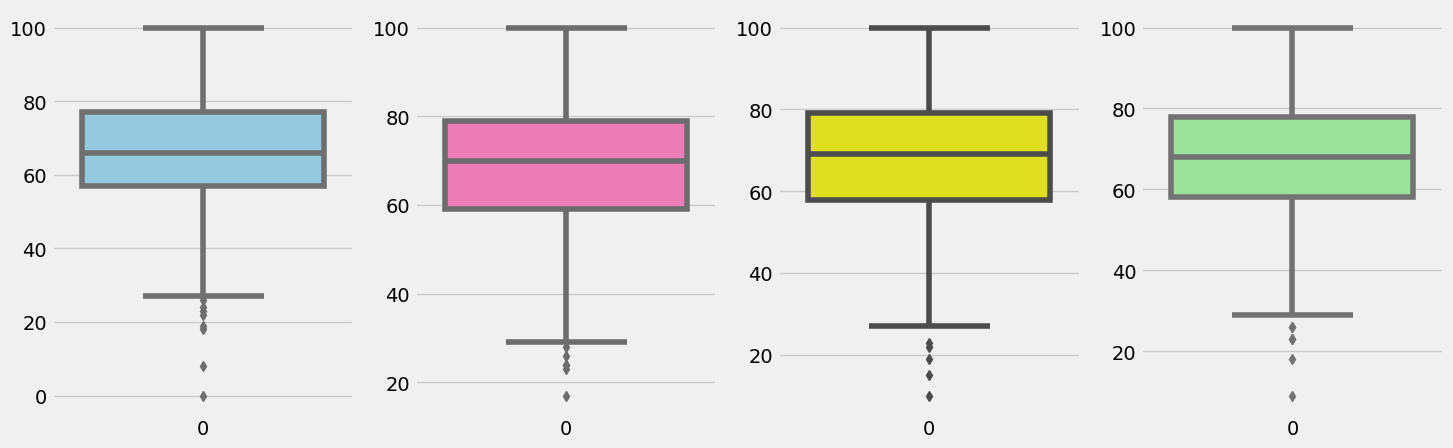

In [86]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['mathScore'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reScore'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['wrScore'],color='yellow')
plt.subplot(144)
sns.boxplot(data['averageScore'],color='lightgreen')
plt.show()

## **11) -EDA Conclusions:**

*   Female students performed better than male students overall except in Math.
*   Students' socio-economic background (lunch financial assistance, parental level of education, racial group) affects their academic performance.

*   The prep course seems to be a helpful factor for students' performance. 






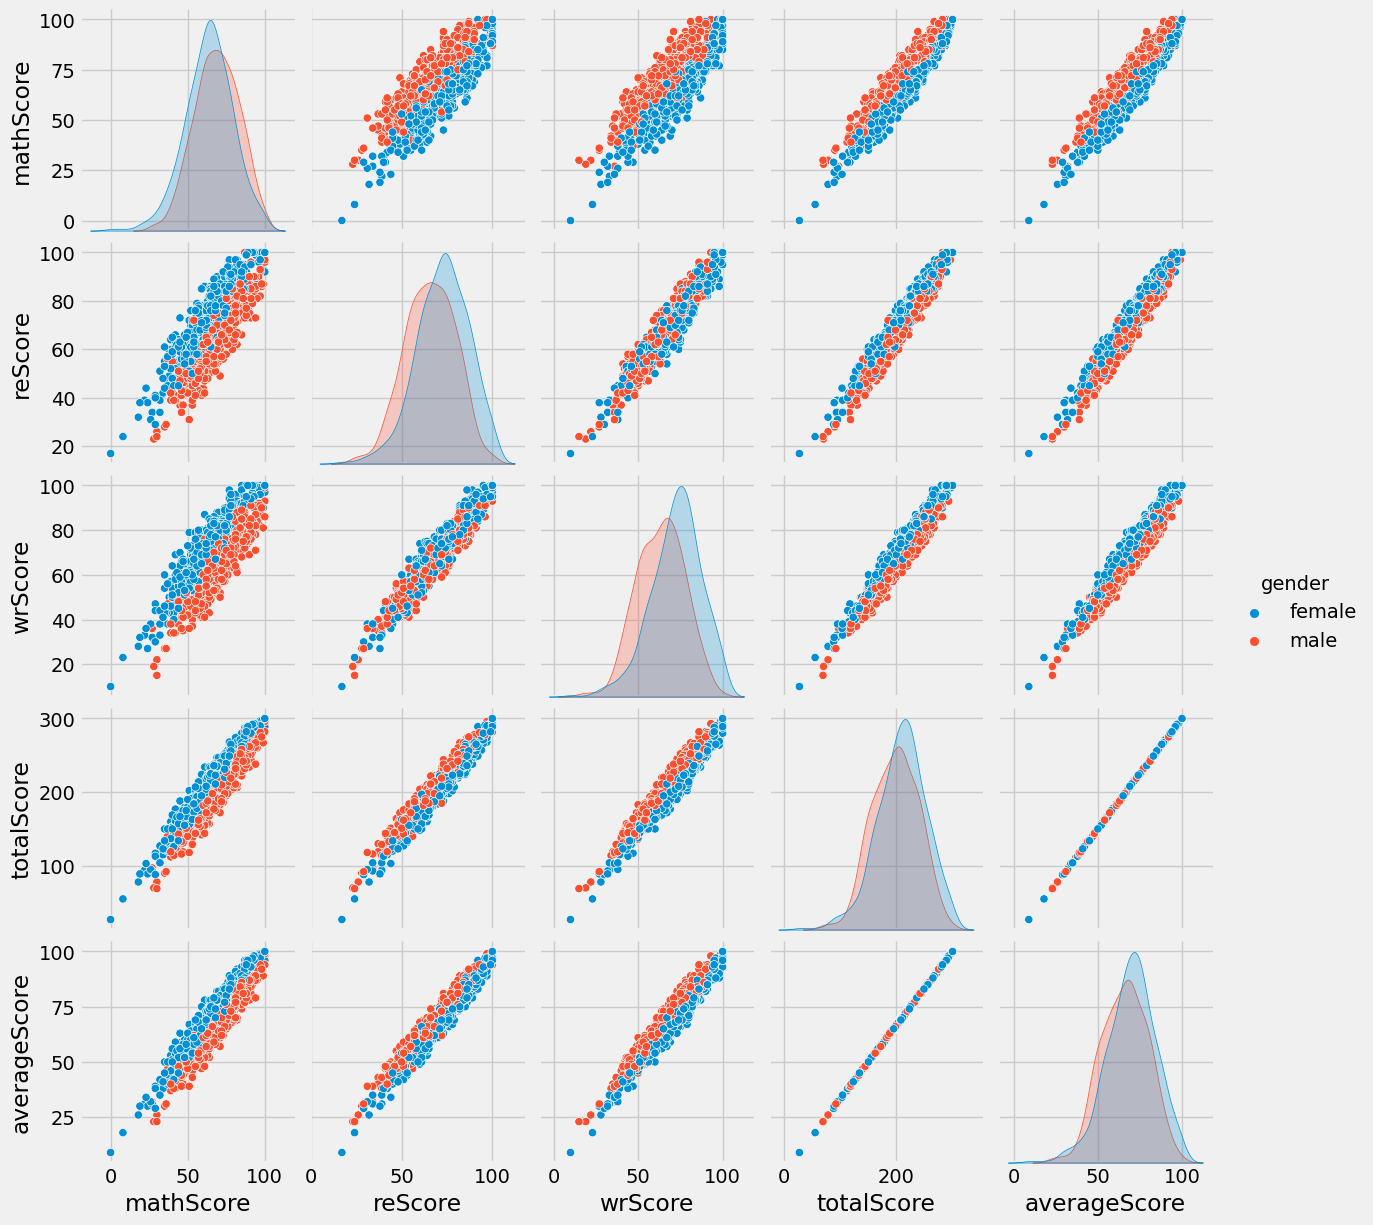

In [88]:
sns.pairplot(data,hue = 'gender')
plt.show()

*   All scores increase linearly with each other.

